In [ ]:
# Import packages
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #sns.set()

In [ ]:
# Import training data
training = pd.read_csv('datasets/iris_train.csv')
training.sample()

In [ ]:
# Import test data
test = pd.read_csv('datasets/iris_test.csv')
test.sample()

In [ ]:
# Create the X, Y, Training and Test
xtrain = training.drop('Species', axis=1)
ytrain = training.loc[:, 'Species']
xtest = test.drop('Species', axis=1)
ytest = test.loc[:, 'Species']

# Init the Gaussian Classifier
model = GaussianNB()

# Train the model 
model.fit(xtrain, ytrain)

# Predict Output 
pred = model.predict(xtest)

# comparing actual response values (y_test) with predicted response values (y_pred)
print("Gaussian Naive Bayes model accuracy(in %):",
      metrics.accuracy_score(ytest, pred)*100)

In [ ]:
# Plot Confusion Matrix
mat = confusion_matrix(pred, ytest)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [6]:
import random
from matplotlib import pyplot as plt
import pandas as pd

class LinReg:
    def __init__(self):
        self.epoch = 10**5
        self.lr = 0.1
        self.slope = random.random()
        self.y_intercept = random.random()

    def train(self, experiences, salaries):
        for i in range(self.epoch):
            # randIndx = random.randint(0, len(experiences)-1)
            for j in range(len(experiences)):
                if random.randint(0, len(experiences)-1) == j:
                    continue
                salPred = self.slope * \
                    experiences[j] + self.y_intercept
                if salPred < salaries[j]:  # above
                    self.slope += self.lr * experiences[j]
                    self.y_intercept += self.lr
                else:  # below
                    self.slope -= self.lr * experiences[j]
                    self.y_intercept -= self.lr
            if i % 10000 == 0:
                print(
                    f"MAE loss: {self.calc_MAE_error(experiences,salaries)}")
                self.lr -= 0.01

    def calc_MAE_error(self, experiences, salaries):
        error = 0.0
        for (x, y) in zip(experiences, salaries):
            error += abs(y - ((self.slope*x) + self.y_intercept))

        return error / len(experiences)

    def predict_y(self, experience):
        return (self.slope * experience) + self.y_intercept

    def plot(self, experiences, salary):
        plt.plot(experiences, salary, linestyle="dashed")
        plt.plot(experiences, [self.predict_y(exp) for exp in experiences])

MAE loss: 75912.29869399052
MAE loss: 7369.1058734223
MAE loss: 5790.389633652597
MAE loss: 5137.325494489467
MAE loss: 4773.89277446848
MAE loss: 4643.858831142379
MAE loss: 4632.73648447672
MAE loss: 4624.1315244636735
MAE loss: 4618.435951135782
MAE loss: 4615.568937803644
Predicted salary for 2.5 year experienced: 48338.2291584382


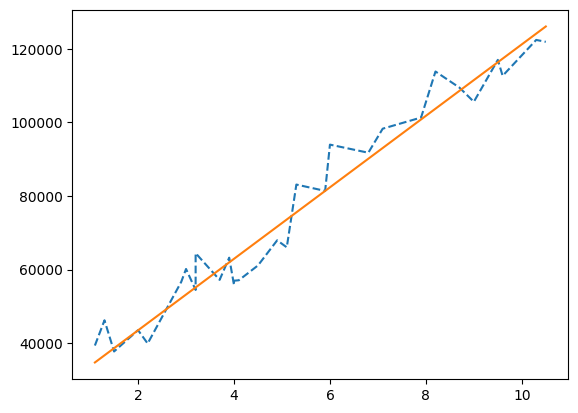

In [7]:
df = pd.read_csv('datasets/Salary_Data.csv')
linreg = LinReg()
linreg.train(df['YearsExperience'], df['Salary'])
pred_sal = linreg.predict_y(2.5)
print(f"Predicted salary for 2.5 year experienced: {pred_sal}")
linreg.plot(df['YearsExperience'], df['Salary'])

In [1]:
import pandas as pd

data = pd.read_csv('datasets/groceries - groceries.csv')
data.tail()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
9830,17,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,1,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,10,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,4,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9834,5,chicken,tropical fruit,other vegetables,vinegar,shopping bags,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
market_items = []

for row in data.iterrows():
    market_items.extend(row[1][1:])

print(len(market_items))

market_items2 = [i for i in market_items if i != 'NaN']

unique_market_items = set(market_items2)

print(len(market_items2), len(unique_market_items))

314720
314720 170
